# Visualization and Learning in Julia

Tom Breloff

https://github.com/tbreloff

### Outline
- Background
- Julia packages
- Plots.jl
- Fun with data

## My background
- BA Mathematics and Economics (U. of Rochester)
- MS Mathematics (NYU Courant Institute)
- Trader, researcher, quant, developer at several big banks and hedge funds, including one which I founded
- High speed algorithmic arbitrage trading and market making
- Machine learning and visualization enthusiast
- Lifelong programmer (since learning BASIC in 4th grade)

## Before Julia
- Python and C/C++
- MATLAB and Java (so many files!!)
- Throughout the years: Mathematica, Go, R, C#, Javascript, Visual Basic/Excel, Lisp, Erlang, ...

## Things I like
- Python
    - Solid packages
    - Easy to get stuff done
- C/C++
    - Fast (when you put in the effort)
- MATLAB
    - Great matrix operations
    - Easy visualizations
- Java
    - Hmmm...  
    ```
    public static boolean DoTheFunctionNamesReallyNeedToBeLongerThanThatMaryPoppinsSong() {
        return true; 
    }```

## Why Julia?
- Easy to code
- Fast with little effort
- Solid vector/matrix support, but more flexible
- Macros and staged functions
- so much more!

(Slow clap...)

# Julia's Package Ecosystem

## Top packages by stars
Package | Github Stars | 2-week change | Type
------ | -------- | ------------- | --------
Gadfly	| 732	| 14 | Plotting
IJulia | 732 | 11 | Workflow
Mocha | 496 | 36 | Learning
DataFrames | 230 | 12 | Data Structures
PyCall | 204 | 4 | Language Wrapper
JuMP | 182 | 5 | Optimization
Escher | 135 | 10 | GUIs
Optim | 131 | 4 | Optimization
Morsel | 128 | -1 | Web (deprecated)
Distributions | 125 | 7 | Statistics


## Recent trends
Package | Github Stars | 2-week change | Type
------ | -------- | ------------- | --------
Mocha | 496 | 36 | Learning
Gadfly | 732 |  14 | Plotting
DataFrames | 230 |  12 | Data Structures
IJulia | 732 |  11 | Workflow
Escher | 135 |  10 | GUIs
Interact|  102 |  8 | GUIs
Distributions|  125 | 7 | Statistics
Plots|  23 | 6  | Plotting
Seismic|  7 | 6 | Plotting
Immerse | 23 | 5 |  Plotting


## Statistics and Learning in Julia
- Stats (mostly in JuliaStats)
    - StatsBase
    - Distributions
    - DataFrames, DataArrays, NullableArrays
    - MultivariateStats, GLM
    - OnlineStats
    - many more...
    

## Statistics and Learning in Julia
- Optimization (mostly in JuliaOpt)
    - MathProgBase
    - JuMP
    - Optim
    - Convex
    - NLOpt
    

## Statistics and Learning in Julia
- Machine learning
    - Mocha
    - GeneticAlgorithms
    - Orchestra
    - TextAnalysis
    - Clustering
    - OnlineAI
    - many more...

## Visualization in Julia

Lots of packages: Gadfly, PyPlot, Vega, Winston, UnicodePlots, Qwt, Bokeh, Immerse, GLPlot ... 

Strengths:
- Interactive: Immerse, PyPlot, Qwt
- Fast: GLPlot
- Easy/concise: UnicodePlots, Winston, Qwt
- Pretty: Gadfly, Vega, Bokeh
- Native: Gadfly, Winston, UnicodePlots
- Features: PyPlot

Learning more than one or two packages is time consuming and impractical...

### Why do I have to choose one?!?

# What makes good code design?

## Good design: AbstractArray
Many concrete array-types:
- Dense arrays
- Sparse arrays
- Ranges
- Distributed arrays
- Shared arrays
- GPU arrays
- Custom data structures

Common code is implemented once for AbstractArray, and all concrete types get the benefit.

In [52]:
type ScaryVec <: AbstractArray{Int,1}
    boo::Int
    n::Int
    ScaryVec(n::Integer) = new(rand(1:n), n)
end
Base.size(sv::ScaryVec) = (sv.n,)
Base.getindex(sv::ScaryVec, i::Integer) = (i == sv.boo ? "BOO!" : i)

sv = ScaryVec(5)

5-element ScaryVec:
 1      
  "BOO!"
 3      
 4      
 5      

In [53]:
filter(x -> isa(x, Number), sv)

4-element Array{Int64,1}:
 1
 3
 4
 5

## Good design: AbstractArray
- Inheriting from AbstractArray gives you a lot "for free":
    - Iteration (`map`, `for x in ...`, `filter`, ...)
    - Operations
    - Printing
    - etc
- Few methods to implement... only what's needed.
- Abstractions put overlapping functionality in one place
    - Easy to code
    - Easy to maintain


### Imagine if there were no AbstractArray...

### Gadfly : `____________` :: ScaryVector : AbstractArray

Thinking of graphics packages as concrete types, we see that we have many different types, but no abstraction linking them together. 

# Plots.jl
### The AbstractArray of plotting...

In [6]:
# setup... choose Gadfly as the backend, set some session defaults
using Plots
gadfly()
default(size=(600,500), legend=false)

# create parametric functions
fx(u) = 1.6sin(u)^3
fy(u) = 0.3 + 1.5cos(u) - 0.6cos(2u) - 0.25cos(3u) - cos(4u)/8

# plot and annotate
p = plot(fx, fy, 0, 2π, line=(5,:darkred), xlim=(-2,2), ylim=(-2,2))
annotate!(0, -0.15, text(" I ♡\nPlots", 45, -0.1π, :darkred));

(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)


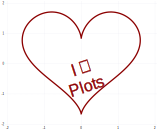

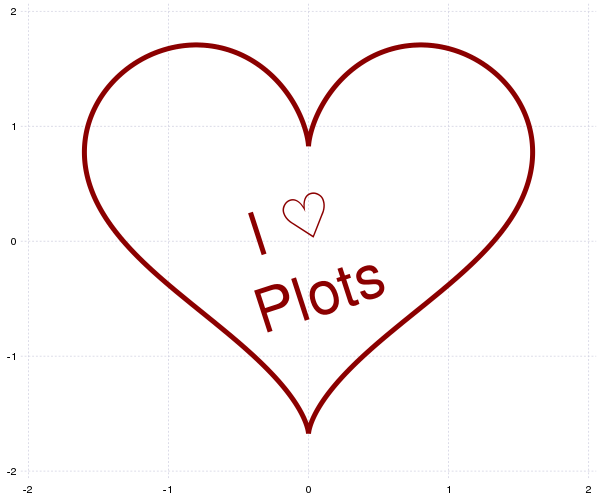

In [7]:
p

In [8]:
# use the same parametric functions to create a custom marker shape
us = linspace(0, 2π, 100)
heart = Shape([(fx(u), fy(u)) for u in us])

# generate some data
n = 50
xy() = 4rand(2) - 2

# add a title
title!("Let me count the ways...")

# add a new series
scatter!(1, z=1:n, marker=(heart,15,:reds))

# animations!
anim = Animation()
for i in 1:n
    x, y = xy()
    
    # add to a series after creation
    push!(p, 2, x, y)
    
    # easy annotations
    annotate!(x, y, text(i))
    
    # save an animation frame
    frame(anim)
end

(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) = (nothing,nothing)
(xmeta,ymeta) 

In [9]:
gif(anim, "iheartplots.gif", fps=3)

INFO: Saved animation to /home/tom/.julia/v0.4/Plots/examples/meetup/iheartplots.gif


Plots.AnimatedGif("/home/tom/.julia/v0.4/Plots/examples/meetup/iheartplots.gif")

# One problem...

<img src="cart-before-the-horse.jpg" style="width: 800px; height: 500px;">

When the abstract comes after the concrete, it's a lot more work.  Oops.  Better late than never!!

## Fun with data - UCI Wine Quality Dataset
<img src="wine-toast.jpg" style="width: 800px; height: 500px;">

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

# Come collaborate:
- Plots.jl
- OnlineStats.jl
- OnlineAI.jl
- LearnBase.jl
- Unums.jl

# or get in touch:
- tom@breloff.com
- https://github.com/tbreloff